In [128]:
import pandas as pd
import numpy as np
import sklearn as skl
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as plt
import matplotlib.pyplot as plt

In [129]:
#EDA
df = pd.read_csv("house_prices.csv")
#print(df.groupby('facing'))
#df.info()
'''cols = ['Status','Index','Title','Description','overlooking', 'facing','Society','Dimensions','Plot Area','Floor','Carpet Area','location','Ownership','Car Parking','Transaction']
df = df.drop(columns=cols)
df= df.drop(columns = ['Furnishing'])'''
#df.head(10)'
#df['Super Area']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [130]:
# Check how many rows are missing BOTH
missing_both = df[df['Carpet Area'].isnull() & df['Super Area'].isnull()]
print(f"Rows missing BOTH areas: {len(missing_both)} ({len(missing_both)/len(df)*100:.2f}%)")
df.dropna(subset=['Super Area', 'Price (in rupees)'], inplace=True)

Rows missing BOTH areas: 827 (0.44%)


In [131]:
super_area = df['Super Area'].str.replace(r"[^\d\.\-]", "", regex=True) \
                               .pipe(pd.to_numeric, errors="coerce") \
                               .astype(float)

carpet_area = df['Carpet Area'].str.replace(r"[^\d\.\-]", "", regex=True) \
                               .pipe(pd.to_numeric, errors="coerce") \
                               .astype(float)

5         0.007779
7         0.007779
8         0.007779
11        0.007779
12        0.007779
            ...   
187521    0.005614
187526    0.005614
187527    0.005614
187529    0.005614
187530    0.005614
Name: location, Length: 76235, dtype: float64

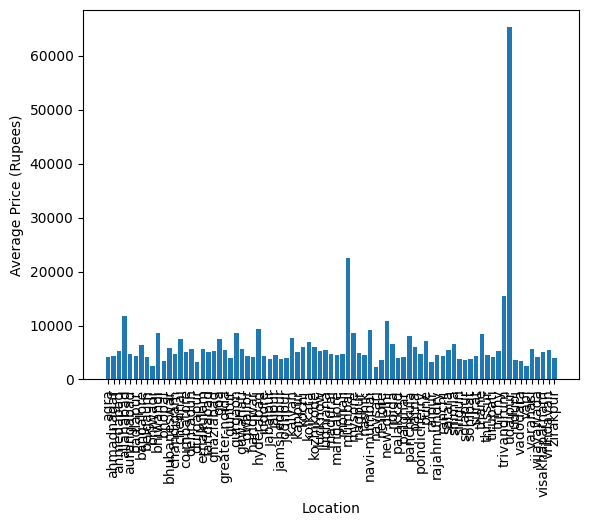

In [132]:
mean_price = df.groupby("location")["Price (in rupees)"].mean()

plt.bar(mean_price.index, mean_price.values)
plt.xlabel("Location")
plt.ylabel("Average Price (Rupees)")
plt.xticks(rotation=90)
#plt.show()
#plot location priuce graph to find rtelationship between location and price. relationship found, make a location frequency df
loc_freq_encoded = df.groupby('location')['location'].transform('count')/len(df)
loc_freq_encoded


/tmp/ipykernel_8152/4172145555.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices = binned_df.groupby('Bin')['Price'].mean()


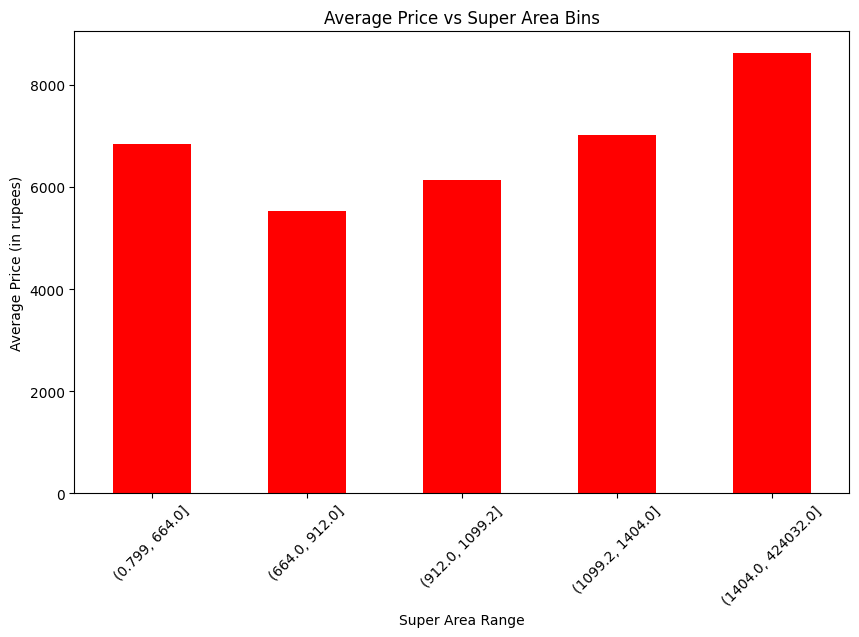

In [133]:
super_area = super_area.fillna(carpet_area * 1.25)
super_area_bins = pd.qcut(super_area, q=5, duplicates='drop')

# --- Step 3: Combine with prices ---
sa_binned_df = pd.DataFrame({
    'Super Area': super_area,
    'Price': prices,
    'Bin': super_area_bins
})

# Compute average price per bin
mean_prices = binned_df.groupby('Bin')['Price'].mean()


plt.figure(figsize=(10,6))
mean_prices.plot(kind='bar', color='red')
plt.xlabel("Super Area Range")
plt.ylabel("Average Price (in rupees)")
plt.title("Average Price vs Super Area Bins")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_8152/385177839.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices = binned_df.groupby('Bin')['Price'].mean()


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '(0.799, 664.0]'),
  Text(1, 0, '(664.0, 912.0]'),
  Text(2, 0, '(912.0, 1099.2]'),
  Text(3, 0, '(1099.2, 1404.0]'),
  Text(4, 0, '(1404.0, 424032.0]')])

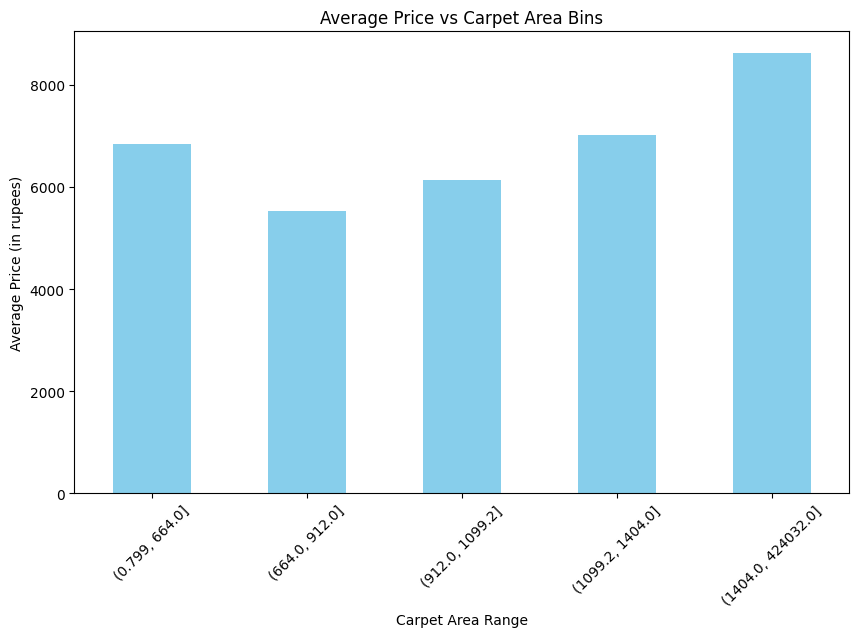

In [134]:
carpet_area = carpet_area.fillna(super_area / 1.25)

# Replace NaN with mean

# Prices
prices = df['Price (in rupees)']

# --- Step 2: Bin Carpet Area ---
# Here we use 5 quantile-based bins to evenly distribute data
carpet_area_bins = pd.qcut(carpet_area, q=5, duplicates='drop')

# --- Step 3: Combine with prices ---
binned_df = pd.DataFrame({
    'Carpet Area': carpet_area,
    'Price': prices,
    'Bin': carpet_area_bins
})

# Compute average price per bin
mean_prices = binned_df.groupby('Bin')['Price'].mean()

# --- Step 4: Plot ---
plt.figure(figsize=(10,6))
mean_prices.plot(kind='bar', color='skyblue')
plt.xlabel("Carpet Area Range")
plt.ylabel("Average Price (in rupees)")
plt.title("Average Price vs Carpet Area Bins")
plt.xticks(rotation=45)
#plt.show()



<class 'pandas.core.frame.DataFrame'>
Index: 76235 entries, 5 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              76235 non-null  int64  
 1   Title              76235 non-null  object 
 2   Description        73627 non-null  object 
 3   Amount(in rupees)  76235 non-null  object 
 4   Price (in rupees)  76235 non-null  float64
 5   location           76235 non-null  object 
 6   Carpet Area        0 non-null      object 
 7   Status             75716 non-null  object 
 8   Floor              71495 non-null  object 
 9   Transaction        76232 non-null  object 
 10  Furnishing         74198 non-null  object 
 11  facing             30060 non-null  object 
 12  overlooking        27062 non-null  object 
 13  Society            24336 non-null  object 
 14  Bathroom           75497 non-null  object 
 15  Balcony            35955 non-null  object 
 16  Car Parking        22200 n

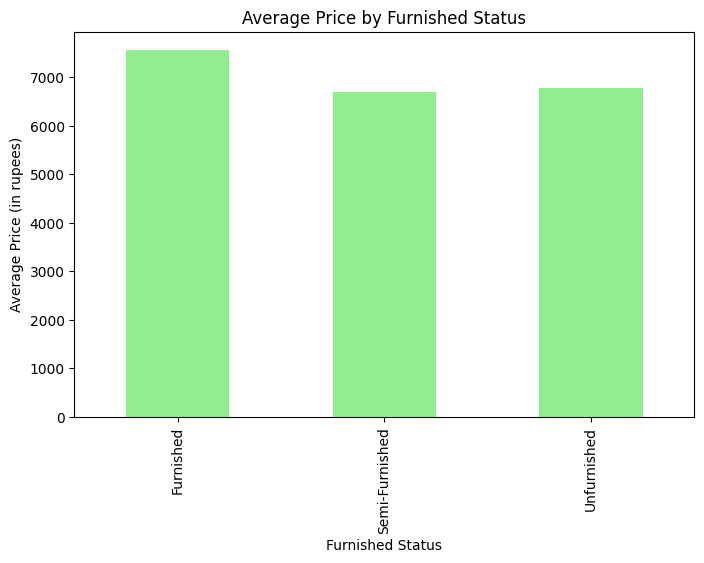

In [135]:
avg_price_furnished = df.groupby('Furnishing')['Price (in rupees)'].mean()
df.info()
plt.figure(figsize=(8,5))
avg_price_furnished.plot(kind='bar', color='lightgreen')
plt.xlabel("Furnished Status")
plt.ylabel("Average Price (in rupees)")
plt.title("Average Price by Furnished Status")
plt.show()


In [136]:
df["Amount(in rupees)"] = df["Amount(in rupees)"].str.replace(r"[^\d\.\-]","",regex = True).pipe(pd.to_numeric,errors="coerce")
df["Amount(in rupees)"] = df["Amount(in rupees)"].astype(float)
df["Amount(in rupees)"] = df["Amount(in rupees)"].fillna(df["Amount(in rupees)"].mean())

In [137]:

df["Price (in rupees)"] = df["Price (in rupees)"].astype(float)
df["Price (in rupees)"] = df["Price (in rupees)"].fillna(df["Price (in rupees)"].mean())


In [138]:
df["Balcony"] = df["Balcony"].str.replace(r"[^\d\.\-]","",regex = True).pipe(pd.to_numeric,errors="coerce")
df["Balcony"] = df["Balcony"].astype(float)
df["Balcony"] = df["Balcony"].fillna(df["Balcony"].mean())


In [139]:
df["Bathroom"] = df["Bathroom"].str.replace(r"[^\d\.\-]","",regex = True).pipe(pd.to_numeric,errors="coerce")
df["Bathroom"] = df["Bathroom"].astype(float)
df["Bathroom"] = df["Bathroom"].fillna(df["Bathroom"].mean())

In [140]:
#scaler = MinMaxScaler()
#df[["Amount(in rupees)"]] = scaler.fit_transform(df[["Amount(in rupees)"]])

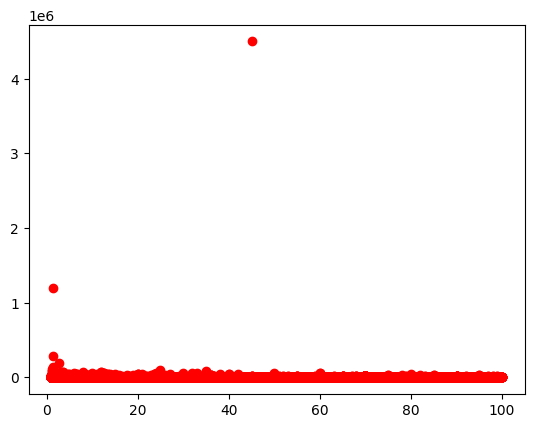

In [141]:
amt = df[["Amount(in rupees)"]]
y = df["Price (in rupees)"]
plt.scatter(amt,y,color='red')

In [142]:
#remove features
cols = ['Status','Index','Title','Description','overlooking', 'facing','Society','Dimensions','Plot Area','Floor','Carpet Area','location','Ownership','Car Parking','Transaction']
df = df.drop(columns=cols)
df= df.drop(columns = ['Furnishing'])

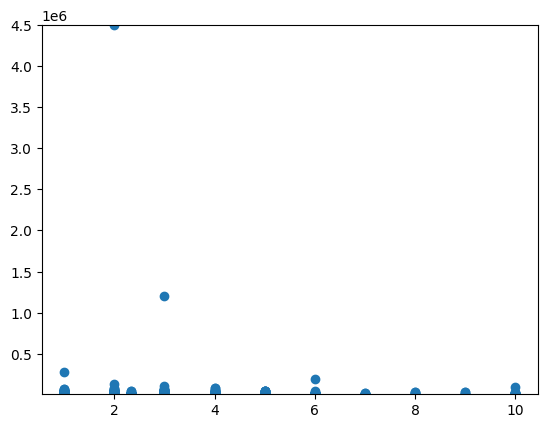

In [143]:
bathroom = df["Bathroom"]
plt.ylim(10000,df["Price (in rupees)"].max())
plt.scatter(bathroom,y)

In [148]:
df_final = df.copy()
new_features = pd.DataFrame({
    'Location Frequency': loc_freq_encoded,
    'Carpet Area' : carpet_area,
    'Super Area' : super_area
})
df_final = pd.concat([df_final[["Bathroom","Balcony"]], new_features], axis=1)
df_final.info()
df_final.head(15)

<class 'pandas.core.frame.DataFrame'>
Index: 76235 entries, 5 to 187530
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bathroom            76235 non-null  float64
 1   Balcony             76235 non-null  float64
 2   Location Frequency  76235 non-null  float64
 3   Carpet Area         76235 non-null  float64
 4   Super Area          76235 non-null  float64
dtypes: float64(5)
memory usage: 3.5 MB


,Bathroom,Balcony,Location Frequency,Carpet Area,Super Area
5,1.0,1.000000,0.007779,544.0,680.0
7,1.0,1.886441,0.007779,460.0,575.0
8,1.0,1.886441,0.007779,480.0,600.0
11,2.0,1.886441,0.007779,932.0,1165.0
12,2.0,1.886441,0.007779,675.2,844.0
14,1.0,1.886441,0.007779,520.0,650.0
17,1.0,1.886441,0.007779,432.0,540.0
19,1.0,1.000000,0.007779,416.0,520.0
25,1.0,1.886441,0.007779,464.0,580.0
27,1.0,1.886441,0.007779,504.0,630.0


In [145]:
model = LinearRegression()
X = df_final
y = df["Price (in rupees)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [147]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# R-squared
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

MSE: 82936467.65715957
R²: 0.014435444235006312
